# Tamer Kanak - 201805069

**Importing Dataset**


In [51]:
import pandas as pd

# Load the dataset into a DataFrame
data = pd.read_csv("DatasetML.csv", delimiter=";")

In [52]:
print(data.isnull().sum())

Öğrenci No      0
Cinsiyet        1
Doğum Yılı      1
Okul Türü       0
Sınıf Düzeyi    0
               ..
AE              0
CE-AC           0
RO-AE           0
lst             0
pass            0
Length: 163, dtype: int64


In [53]:
print(data.isnull().sum().sum())

3075


In [54]:
print(data.columns)

Index(['Öğrenci No', 'Cinsiyet', 'Doğum Yılı', 'Okul Türü', 'Sınıf Düzeyi',
       'Baba Mesleği', 'Baba Eğitim Düzeyi', 'Anne Mesleği',
       'Anne Eğitim Düzeyi', 'Kardeş Sayısı',
       ...
       'c11', 'c12', 'CE', 'RO', 'AC', 'AE', 'CE-AC', 'RO-AE', 'lst', 'pass'],
      dtype='object', length=163)


In [55]:
print(data[["Sınıf 9 Notu", "Sınıf 10 Notu", "Sınıf 11 Notu"]])

      Sınıf 9 Notu  Sınıf 10 Notu  Sınıf 11 Notu
0              3.0            NaN            NaN
1              2.0            NaN            NaN
2              2.0            NaN            NaN
3              3.0            NaN            NaN
4              1.0            NaN            NaN
...            ...            ...            ...
1002           5.0            5.0            5.0
1003           4.0            4.0            4.0
1004           5.0            4.0            4.0
1005           5.0            4.0            5.0
1006           5.0            5.0            5.0

[1007 rows x 3 columns]


**Drop selected columns containing missing values and unnecessary datas**



In [56]:
data.drop(columns=["Baba Mesleği", "Anne Mesleği", "Öğrenci No", "Sınıf 9 Notu", "Sınıf 10 Notu", "Sınıf 11 Notu", "Doğum Yılı"], inplace=True)

**Process of the gender values**



In [57]:
data['Cinsiyet'] = data['Cinsiyet'].replace(1, 0)
data['Cinsiyet'] = data['Cinsiyet'].replace(2, 1)

In [58]:
print(data.isnull().sum().sum())

1868


**Calculate the count of NaN values in each row**



In [59]:
nan_counts = data.isnull().sum(axis=1)
print(nan_counts)

0        0
1        0
2        0
3        0
4        1
        ..
1002    51
1003     1
1004    48
1005     1
1006     0
Length: 1007, dtype: int64


**Filter rows with 4 or more NaN values**



In [60]:
data = data[nan_counts < 4]

In [61]:
print(data.isnull().sum().sum())

335


In [62]:
print(len(data))
print(data.isnull().sum().sum())

911
335


In [63]:
print(data[["Not Ortalaması aps", "lsi121", "CE", "CE-AC"]].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 911 entries, 0 to 1006
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Not Ortalaması aps  889 non-null    object
 1   lsi121              911 non-null    object
 2   CE                  911 non-null    object
 3   CE-AC               911 non-null    object
dtypes: object(4)
memory usage: 35.6+ KB
None


**Replace commas with periods and convert selected columns to float and then to int**


In [64]:
data[["Not Ortalaması aps", "lsi121", "CE", "CE-AC"]] = data[["Not Ortalaması aps", "lsi121", "CE", "CE-AC"]].apply(lambda x: x.str.replace(",", "."))
data[["Not Ortalaması aps", "lsi121", "CE", "CE-AC"]] = data[["Not Ortalaması aps", "lsi121", "CE", "CE-AC"]].astype(float)

**Dropping missing data**


In [65]:
# Drop rows with missing values
data.dropna(inplace=True)

In [66]:
data[["Not Ortalaması aps", "lsi121", "CE", "CE-AC"]] = data[["Not Ortalaması aps", "lsi121", "CE", "CE-AC"]].astype(int)

In [67]:
print(data[["Not Ortalaması aps", "lsi121", "CE", "CE-AC"]].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 0 to 1006
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Not Ortalaması aps  660 non-null    int32
 1   lsi121              660 non-null    int32
 2   CE                  660 non-null    int32
 3   CE-AC               660 non-null    int32
dtypes: int32(4)
memory usage: 15.5 KB
None


In [68]:
data.isnull().sum()

Cinsiyet              0
Okul Türü             0
Sınıf Düzeyi          0
Baba Eğitim Düzeyi    0
Anne Eğitim Düzeyi    0
                     ..
AE                    0
CE-AC                 0
RO-AE                 0
lst                   0
pass                  0
Length: 156, dtype: int64

In [69]:
data.head(10)

,Cinsiyet,Okul Türü,Sınıf Düzeyi,Baba Eğitim Düzeyi,Anne Eğitim Düzeyi,Kardeş Sayısı,Kitap Sayısı,Evde Bilgisayar,Evde İnternet,Evde Çalışma Odası,...,c11,c12,CE,RO,AC,AE,CE-AC,RO-AE,lst,pass
0,0.0,3,9,2.0,2.0,0.0,2.0,1.0,1.0,1.0,...,4.0,4.0,25,26,38,31,-13,-5,3,27
1,1.0,3,9,3.0,2.0,2.0,2.0,1.0,1.0,1.0,...,4.0,4.0,69,26,37,27,32,-1,2,11
2,1.0,3,9,5.0,2.0,2.0,3.0,0.0,0.0,1.0,...,3.0,3.0,35,24,34,27,1,-3,2,8
3,0.0,3,9,4.0,3.0,1.0,3.0,1.0,1.0,1.0,...,3.0,3.0,21,24,39,36,-18,-12,3,31
5,0.0,3,9,4.0,4.0,1.0,3.0,1.0,1.0,1.0,...,2.0,1.0,14,24,41,41,-27,-17,3,56
6,0.0,3,9,3.0,2.0,1.0,3.0,1.0,1.0,1.0,...,4.0,4.0,22,43,29,26,-7,17,4,47
7,1.0,3,9,4.0,3.0,2.0,3.0,1.0,1.0,1.0,...,3.0,2.0,24,32,31,33,-7,-1,3,62
8,1.0,3,9,4.0,4.0,2.0,4.0,1.0,1.0,1.0,...,3.0,4.0,19,30,33,38,-14,-8,3,43
9,0.0,3,9,2.0,1.0,4.0,1.0,0.0,0.0,1.0,...,4.0,3.0,24,27,35,34,-11,-7,3,21
10,1.0,3,9,3.0,4.0,2.0,3.0,1.0,1.0,1.0,...,4.0,4.0,25,25,29,41,-4,-16,3,77


**Since the feature extraction of the columns in this range is present in the dataset, they need to be dropped from the dataset.**


In [70]:
print(data.iloc[:,18:148].columns) # Drop specific columns from the DataFrame

Index(['En sevilen konu', 'lsi11', 'lsi12', 'lsi13', 'lsi14', 'lsi21', 'lsi22',
       'lsi23', 'lsi24', 'lsi31',
       ...
       'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12'],
      dtype='object', length=130)


**Drop specific columns from the DataFrame**

**Defining dataForPass because it will be needed to estimate output in the future**


In [71]:
dataForPass = data 
data = data.drop(data.columns[18:148], axis=1)

In [72]:
data.head(10)

,Cinsiyet,Okul Türü,Sınıf Düzeyi,Baba Eğitim Düzeyi,Anne Eğitim Düzeyi,Kardeş Sayısı,Kitap Sayısı,Evde Bilgisayar,Evde İnternet,Evde Çalışma Odası,...,Drsn Fizik Sıklığı,Drsn ÖSS Sıklığı,CE,RO,AC,AE,CE-AC,RO-AE,lst,pass
0,0.0,3,9,2.0,2.0,0.0,2.0,1.0,1.0,1.0,...,1.0,1.0,25,26,38,31,-13,-5,3,27
1,1.0,3,9,3.0,2.0,2.0,2.0,1.0,1.0,1.0,...,1.0,1.0,69,26,37,27,32,-1,2,11
2,1.0,3,9,5.0,2.0,2.0,3.0,0.0,0.0,1.0,...,1.0,1.0,35,24,34,27,1,-3,2,8
3,0.0,3,9,4.0,3.0,1.0,3.0,1.0,1.0,1.0,...,1.0,1.0,21,24,39,36,-18,-12,3,31
5,0.0,3,9,4.0,4.0,1.0,3.0,1.0,1.0,1.0,...,1.0,1.0,14,24,41,41,-27,-17,3,56
6,0.0,3,9,3.0,2.0,1.0,3.0,1.0,1.0,1.0,...,1.0,1.0,22,43,29,26,-7,17,4,47
7,1.0,3,9,4.0,3.0,2.0,3.0,1.0,1.0,1.0,...,1.0,1.0,24,32,31,33,-7,-1,3,62
8,1.0,3,9,4.0,4.0,2.0,4.0,1.0,1.0,1.0,...,1.0,1.0,19,30,33,38,-14,-8,3,43
9,0.0,3,9,2.0,1.0,4.0,1.0,0.0,0.0,1.0,...,1.0,1.0,24,27,35,34,-11,-7,3,21
10,1.0,3,9,3.0,4.0,2.0,3.0,1.0,1.0,1.0,...,1.0,1.0,25,25,29,41,-4,-16,3,77


In [73]:
print(data.isnull().sum().sum())

0


**Replace values less than 1 in the specified column with 1, and values greater than 3 with 3**

**Replace values less than 1 in the specified column with 1**


In [74]:
data.loc[data["Okul Kursu Önemi"] < 1, "Okul Kursu Önemi"] = 1
data.loc[data["Okul Kursu Önemi"] > 3, "Okul Kursu Önemi"] = 3

data.loc[data["Özel Ders Sıklığı"] < 1, "Özel Ders Sıklığı"] = 1

**Perform one\-hot encoding for categorical columns**


In [75]:
data_encoded = pd.get_dummies(data, columns=["lst"]).astype(int)

**Remove the "Not Ortalaması aps" column from the dataset and store it separately**



In [76]:
not_ortalamasi_aps = data_encoded.pop("Not Ortalaması aps")

**Append the "Not Ortalaması aps" column to the end of the dataset**



In [77]:
data_encoded["Not Ortalaması aps"] = not_ortalamasi_aps

# Reset the index of the DataFrame
data_encoded.reset_index(drop=True, inplace=True)

**Correlation Map**


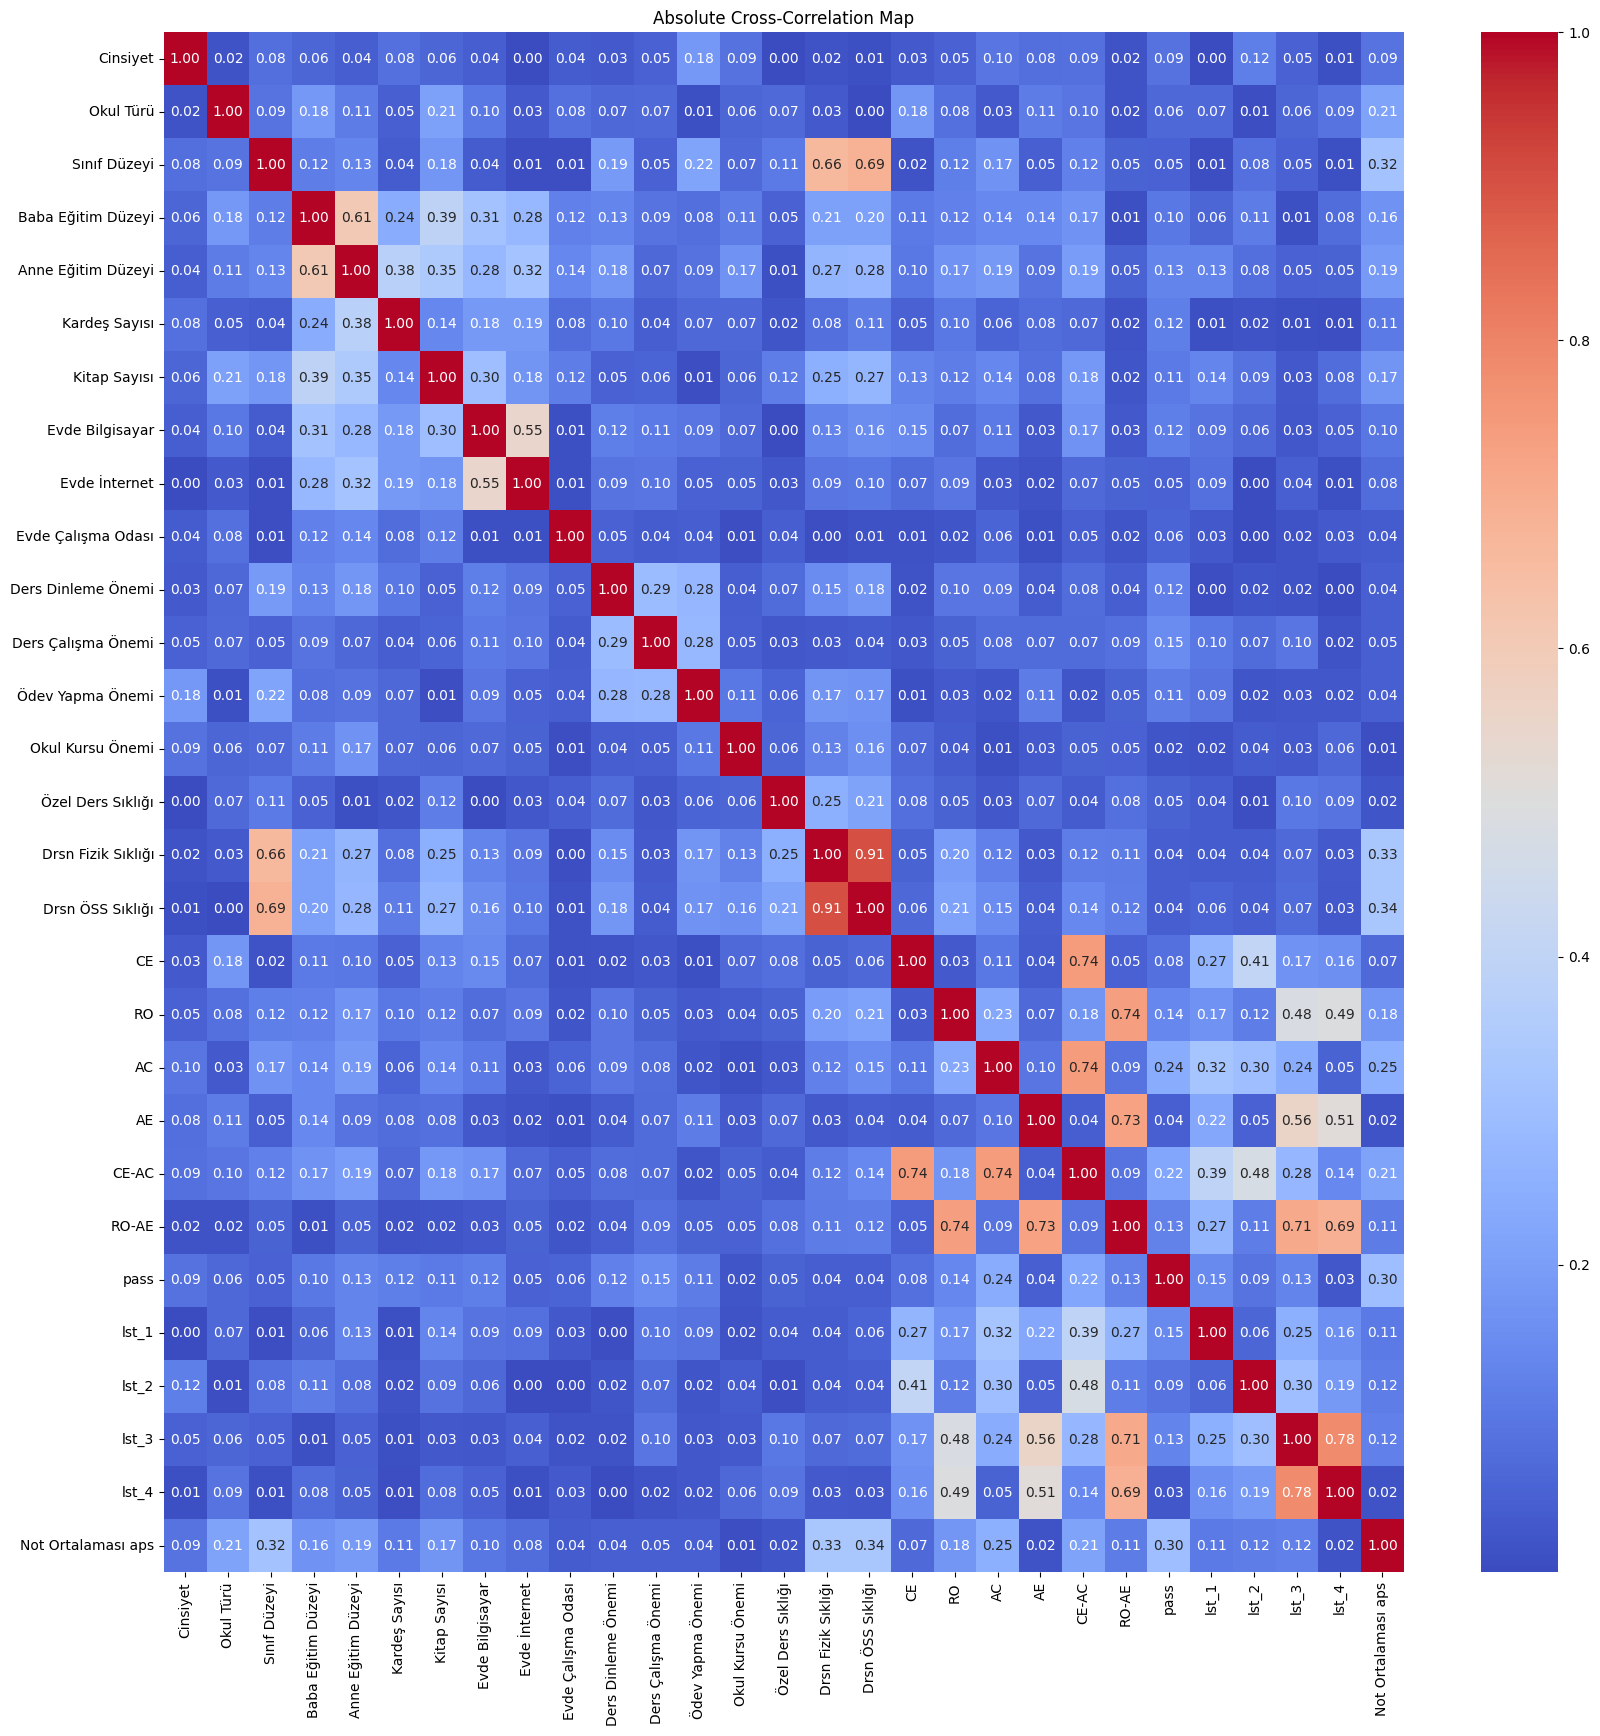

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data_encoded.corr().abs()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Absolute Cross-Correlation Map")
plt.show()

**Visualisation of the effect of grade point average on some variables**


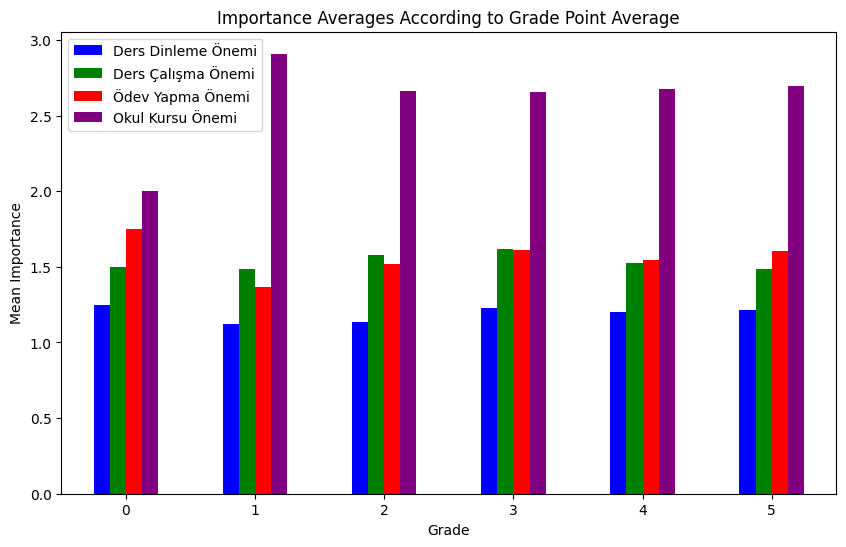

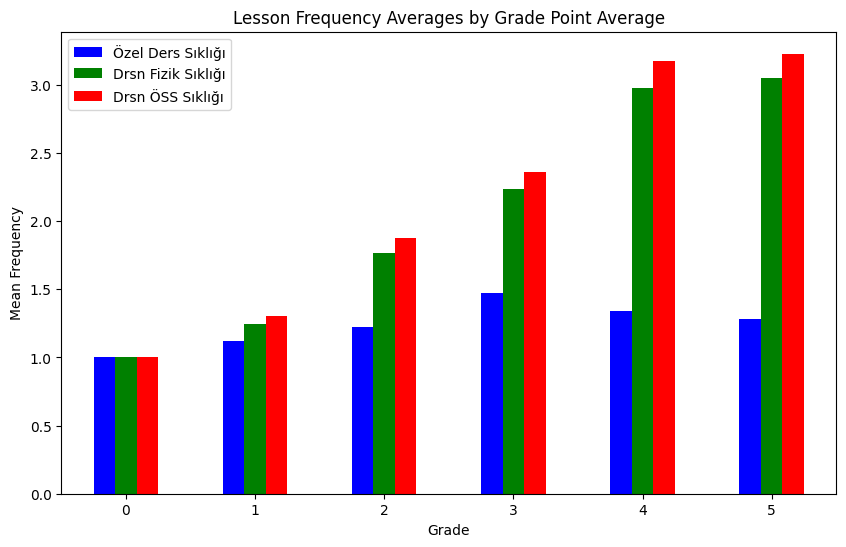

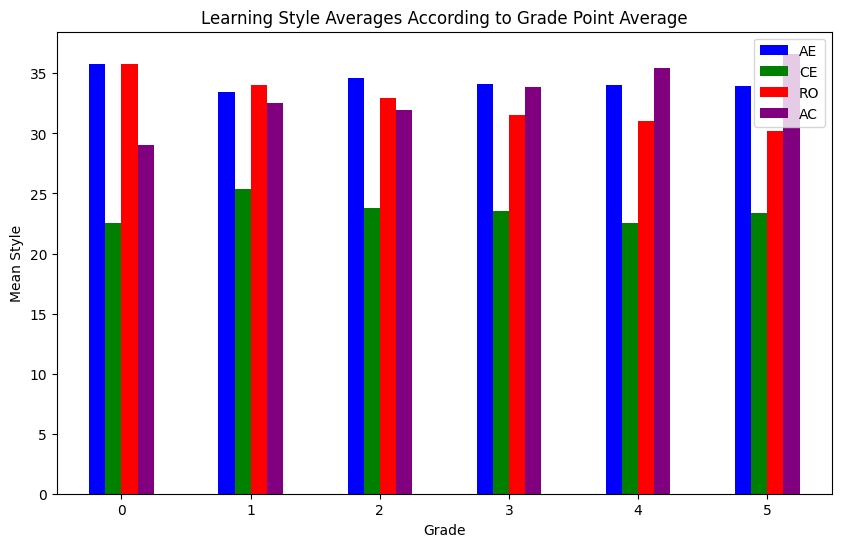

In [79]:
# Grouping by grades and averaging
average_groups = data.groupby('Not Ortalaması aps')
average_importance = average_groups[['Ders Dinleme Önemi', 'Ders Çalışma Önemi', 'Ödev Yapma Önemi', 'Okul Kursu Önemi']].mean()

# Creating a bar plot
average_importance.plot(kind='bar', color=['blue', 'green', 'red', 'purple'], figsize=(10, 6))
plt.xlabel('Grade')
plt.ylabel('Mean Importance')
plt.title('Importance Averages According to Grade Point Average')
plt.xticks(rotation=0)  
plt.show()

# Grouping by grades and averaging
average_frequency = average_groups[["Özel Ders Sıklığı","Drsn Fizik Sıklığı","Drsn ÖSS Sıklığı"]].mean()

# Creating a bar plot
average_frequency.plot(kind='bar', color=['blue', 'green', 'red', 'purple'], figsize=(10, 6))
plt.xlabel('Grade')
plt.ylabel('Mean Frequency')
plt.title('Lesson Frequency Averages by Grade Point Average')
plt.xticks(rotation=0)  
plt.show()

# Grouping by grades and averaging
average_lst = average_groups[["AE","CE","RO","AC"]].mean()

# Creating a bar plot
average_lst.plot(kind='bar', color=['blue', 'green', 'red', 'purple'], figsize=(10, 6))
plt.xlabel('Grade')
plt.ylabel('Mean Style')
plt.title('Learning Style Averages According to Grade Point Average')
plt.xticks(rotation=0)  
plt.show()

**Visualisation of Gender Distribution for Each Grade**


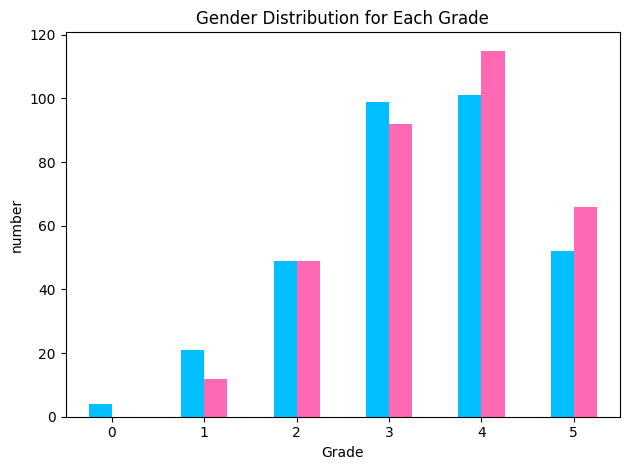

In [80]:
gender_numbers = data.groupby(["Not Ortalaması aps", "Cinsiyet"]).size().unstack()
gender_numbers.plot(kind="bar", color=["deepskyblue", "hotpink"], legend=False)
plt.xlabel("Grade")
plt.ylabel("number")
plt.title("Gender Distribution for Each Grade")
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

**Visualisation of the distribution of learning styles**


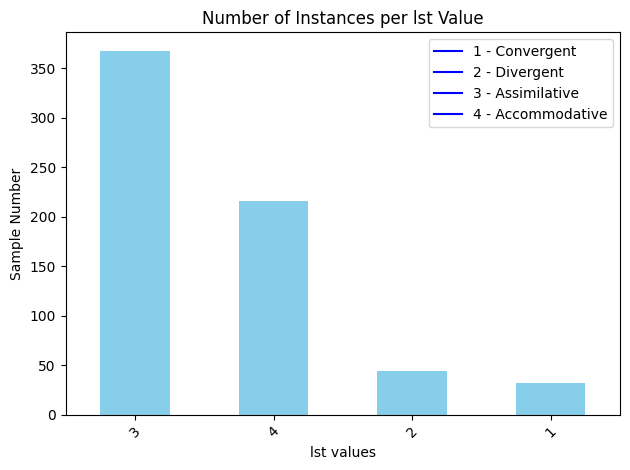

In [81]:
legend_ticks = ["1 - Convergent", "2 - Divergent", "3 - Assimilative", "4 - Accommodative"]  
legend_objects = [plt.Line2D([], [], color='b', label=tick) for tick in legend_ticks]  

sampleCount = data['lst'].value_counts()
sampleCount.plot(kind="bar", color='skyblue')
plt.xlabel('lst values')
plt.ylabel('Sample Number')
plt.title("Number of Instances per lst Value")
plt.xticks(rotation=45) 
plt.legend(legend_objects, legend_ticks, loc='upper right')  
plt.tight_layout()
plt.show()

**Clear visualisation of learning styles through student data**


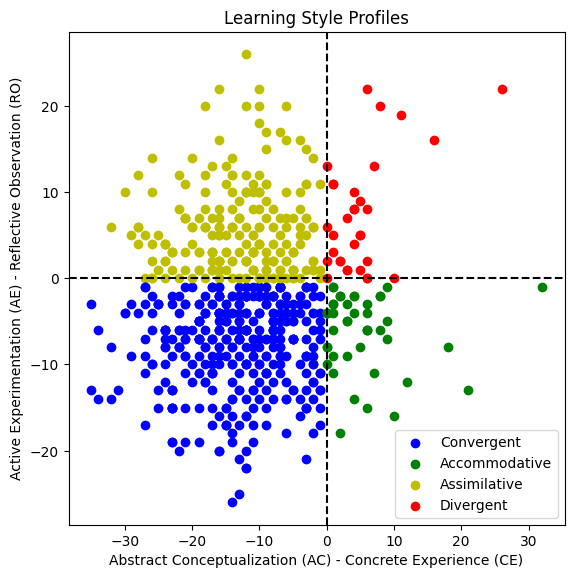

In [82]:
# Create a color palette
colors = ["r", "g", "b", "y"]

# Add colors to the list for each point
colors_list = []
for i in range(len(data_encoded)):
    lst_values = data_encoded.loc[i, ["lst_1", "lst_2", "lst_3", "lst_4"]]
    max_value = lst_values.argmax()
    colors_list.append(colors[max_value])
    
fig, ax = plt.subplots(figsize=(6.4,6.4))

# Add data points for each student
colors_unique = {"r": "Divergent", "g": "Accommodative", "b": "Convergent", "y": "Assimilative"}
for i in range(len(data_encoded)):
    x = data_encoded.loc[i, "CE-AC"]
    y = data_encoded.loc[i, "RO-AE"]
    ax.scatter(x, y, c = colors_list[i], label=colors_unique[colors_list[i]])
    colors_unique[colors_list[i]] = "_nolegend_"

# Set labels and title
ax.set_xlabel("Abstract Conceptualization (AC) - Concrete Experience (CE)")
ax.set_ylabel("Active Experimentation (AE) - Reflective Observation (RO)")
ax.set_title("Learning Style Profiles")

# Show quadrant lines
ax.axhline(y=0, color="black", linestyle="dashed")
ax.axvline(x=0, color="black", linestyle="dashed")

ax.legend()    
# Show the plot
plt.show()

**Cleaning of outliers**


In [83]:
filtered_rows = data[
    (data['Not Ortalaması aps'] == 5) & 
    (data['Ders Dinleme Önemi'] == 1) & 
    (data['Ders Çalışma Önemi'] == 1) & 
    (data['Ödev Yapma Önemi'] == 1) & 
    (data['Drsn ÖSS Sıklığı'] == 1) & 
    (data['Drsn Fizik Sıklığı'] == 1)
]

data = data.drop(filtered_rows.index)

In [84]:
print(len(data))
data.head()

639


,Cinsiyet,Okul Türü,Sınıf Düzeyi,Baba Eğitim Düzeyi,Anne Eğitim Düzeyi,Kardeş Sayısı,Kitap Sayısı,Evde Bilgisayar,Evde İnternet,Evde Çalışma Odası,...,Drsn Fizik Sıklığı,Drsn ÖSS Sıklığı,CE,RO,AC,AE,CE-AC,RO-AE,lst,pass
0,0.0,3,9,2.0,2.0,0.0,2.0,1.0,1.0,1.0,...,1.0,1.0,25,26,38,31,-13,-5,3,27
1,1.0,3,9,3.0,2.0,2.0,2.0,1.0,1.0,1.0,...,1.0,1.0,69,26,37,27,32,-1,2,11
2,1.0,3,9,5.0,2.0,2.0,3.0,0.0,0.0,1.0,...,1.0,1.0,35,24,34,27,1,-3,2,8
3,0.0,3,9,4.0,3.0,1.0,3.0,1.0,1.0,1.0,...,1.0,1.0,21,24,39,36,-18,-12,3,31
5,0.0,3,9,4.0,4.0,1.0,3.0,1.0,1.0,1.0,...,1.0,1.0,14,24,41,41,-27,-17,3,56


**Defining stage for predicting the learning style**

**Removal of some features due to high correlation**


In [85]:
X = data.drop(columns= ["lst", "Not Ortalaması aps", "pass", "CE","AC","RO","AE"], axis = 1)
y = data["lst"]

**Train and Test Split & Scaling**


In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Removing unnecessary columns by coefficient using LassoCV**


In [87]:
from sklearn.linear_model import LassoCV

# Let's build a model and apply Lasso Regression
lasso = LassoCV(cv=10)
lasso.fit(X_train, y_train)

# Let's show the feature coefficients
print("Feature Coefficients:")
for i, coef in enumerate(lasso.coef_):
    print(f"Feature {i+1}: {coef}")

Feature Coefficients:
Feature 1: -0.0
Feature 2: 0.0
Feature 3: -0.0
Feature 4: 0.011618782431945744
Feature 5: 0.013321970391700183
Feature 6: 0.0
Feature 7: 0.004968087735832424
Feature 8: 0.0
Feature 9: 0.0
Feature 10: 0.0
Feature 11: 0.0
Feature 12: -0.020599701675730577
Feature 13: -0.04654284628089072
Feature 14: 0.0
Feature 15: 0.0
Feature 16: -0.0
Feature 17: -0.0
Feature 18: -0.3396998778310625
Feature 19: 0.244636793632951


**Eliminating the features based on the coefficients produced by LassoCV and performing the scale operation again**


In [88]:
selected_columns = [0,1,3,4,5,7,8,10,11,13,14,15,16]
X = X.drop(columns=X.columns[selected_columns])    
y = data["lst"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47, stratify=y)

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Installing the required algorithm**

**Importing the necessary classification algorithms**


In [89]:
!pip install xgboost

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

# Defining classification algorithms
classifiers = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Neural Network": MLPClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

**Filtering to ignore warnings**


In [91]:
import warnings
warnings.filterwarnings("ignore", category=Warning)

**Model training with Cross Validation and measurement of success metrics**


In [92]:
# Training each classification algorithm, making predictions and calculating accuracy values
for name, classifier in classifiers.items():
    
    classifier.fit(X_train, y_train)

    # Make predictions on both training and testing sets
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)

    # Calculate R-squared scores for both training and testing sets
    train_r2 = accuracy_score(y_train, y_train_pred)
    test_r2 = accuracy_score(y_test, y_test_pred)

    # Print the model name, train R-squared, and test R-squared scores
    print(f"{name.upper()}:")
    print(f"Train Accuracy: {train_r2:.6f}")
    print(f"Test Accuracy: {test_r2:.6f}\n")
    
    scores = cross_validate(classifier, X_train, y_train,
                        scoring=['precision_macro','recall_macro','f1_macro','accuracy'], 
                        cv=10,
                        return_train_score=True)
    scores = pd.DataFrame(scores, index = range(1,11))
    
    print(name.upper())
    print(scores.iloc[:, 2:].mean().apply("{:.6f}".format))  
    print("_______________________________________________________________________") 

K-NEAREST NEIGHBORS:
Train Accuracy: 0.908023
Test Accuracy: 0.875000

K-NEAREST NEIGHBORS
test_precision_macro     0.714001
train_precision_macro    0.872002
test_recall_macro        0.606041
train_recall_macro       0.787888
test_f1_macro            0.630039
train_f1_macro           0.821172
test_accuracy            0.835596
train_accuracy           0.907371
dtype: object
_______________________________________________________________________
DECISION TREE:
Train Accuracy: 1.000000
Test Accuracy: 1.000000

DECISION TREE
test_precision_macro     1.000000
train_precision_macro    1.000000
test_recall_macro        1.000000
train_recall_macro       1.000000
test_f1_macro            1.000000
train_f1_macro           1.000000
test_accuracy            1.000000
train_accuracy           1.000000
dtype: object
_______________________________________________________________________
RANDOM FOREST:
Train Accuracy: 1.000000
Test Accuracy: 1.000000

RANDOM FOREST
test_precision_macro     1.000000
t

**Defining phase for estimating the Grade Point Average**

**Elimination of some features due to low correlation with target**


In [93]:
irrelevantFeatures = ["AE","Evde Çalışma Odası","Özel Ders Sıklığı","Cinsiyet"]
X = data.drop(columns = ["Not Ortalaması aps", "lst", "pass", *irrelevantFeatures], axis = 1)
y = data["Not Ortalaması aps"]

**Train and Test Split**


In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

**Importing the necessary reggresion algorithms**


In [95]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score

regressors = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net Regression": ElasticNet(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boostin Regression": GradientBoostingRegressor(),
    "Bayesian Regression": BayesianRidge(),
    "SVR": SVR(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "KNN Regression": KNeighborsRegressor(),
    "XGBRegressor": XGBRegressor()
}

**Model training with Cross Validation and measurement of success metrics**


In [96]:
for name, regressor in regressors.items():
    
    regressor.fit(X_train, y_train)

    # Make predictions on both training and testing sets
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)

    # Calculate R-squared scores for both training and testing sets
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print the model name, train R-squared, and test R-squared scores
    print(f"{name.upper()}:")
    print(f"Train R-Squared Score: {train_r2:.6f}")
    print(f"Test R-Squared Score: {test_r2:.6f}\n")
    
    print(name.upper())
    scores = cross_validate(regressor, X_train, y_train,
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                    'neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error'], cv = 10, return_train_score=True)
    scores = pd.DataFrame(scores, index=range(1,11))
        
    print(scores.iloc[:, 2:].mean().abs().apply("{:.6f}".format))
    
    print("_______________________________________________________________________")

DOĞRUSAL REGRESYON:
Train R-Squared Score: 0.264291
Test R-Squared Score: 0.259736

DOĞRUSAL REGRESYON
test_r2                                                  0.193813
train_r2                                                 0.266654
test_neg_mean_absolute_error                             0.794000
train_neg_mean_absolute_error                            0.761886
test_neg_mean_squared_error                              0.963056
train_neg_mean_squared_error                             0.890472
test_neg_root_mean_squared_error                         0.977800
train_neg_root_mean_squared_error                        0.943606
test_neg_mean_absolute_percentage_error     62531335980896.046875
train_neg_mean_absolute_percentage_error    60218641219082.937500
dtype: object
_______________________________________________________________________
RIDGE REGRESYONU:
Train R-Squared Score: 0.264316
Test R-Squared Score: 0.259864

RIDGE REGRESYONU
test_r2                                             

test_r2                                                  0.096316
train_r2                                                 0.999910
test_neg_mean_absolute_error                             0.832512
train_neg_mean_absolute_error                            0.006412
test_neg_mean_squared_error                              1.070816
train_neg_mean_squared_error                             0.000110
test_neg_root_mean_squared_error                         1.029283
train_neg_root_mean_squared_error                        0.010385
test_neg_mean_absolute_percentage_error     61644006563101.421875
train_neg_mean_absolute_percentage_error      283283984457.704834
dtype: object
_______________________________________________________________________


**Extracting the previously stored dataForPass dataframe for predicting the Pass dependent variable**


In [97]:
selected_columns = dataForPass.iloc[:, 67:107]
dataForPass = pd.concat([selected_columns, dataForPass["pass"]], axis=1)
dataForPass.dropna(inplace=True)

X = dataForPass.drop(columns = ["pass"], axis = 1)
y = dataForPass["pass"]

**Train and Test Split**


In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

**Importing the necessary reggresion algorithms**


In [99]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score

regressors = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net Regression": ElasticNet(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boostin Regression": GradientBoostingRegressor(),
    "Bayesian Regression": BayesianRidge(),
    "SVR": SVR(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "KNN Regression": KNeighborsRegressor(),
    "XGBRegressor": XGBRegressor()
}

**Model training with Cross Validation and measurement of success metrics**


In [100]:
for name, regressor in regressors.items():
    
    regressor.fit(X_train, y_train)

    # Make predictions on both training and testing sets
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)

    # Calculate R-squared scores for both training and testing sets
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print the model name, train R-squared, and test R-squared scores
    print(f"{name.upper()}:")
    print(f"Train R-Squared Score: {train_r2:.6f}")
    print(f"Test R-Squared Score: {test_r2:.6f}\n")
    
    print(name.upper())
    scores = cross_validate(regressor, X_train, y_train,
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                    'neg_root_mean_squared_error', 'neg_mean_absolute_percentage_error'], cv = 10, return_train_score=True)
    scores = pd.DataFrame(scores, index=range(1,11))
        
    print(scores.iloc[:, 2:].mean().abs().apply("{:.6f}".format))
    
    print("_______________________________________________________________________")

LINEAR REGRESSION:
Train R-Squared Score: 1.000000
Test R-Squared Score: 1.000000

LINEAR REGRESSION
test_r2                                     1.000000
train_r2                                    1.000000
test_neg_mean_absolute_error                0.000000
train_neg_mean_absolute_error               0.000000
test_neg_mean_squared_error                 0.000000
train_neg_mean_squared_error                0.000000
test_neg_root_mean_squared_error            0.000000
train_neg_root_mean_squared_error           0.000000
test_neg_mean_absolute_percentage_error     2.260668
train_neg_mean_absolute_percentage_error    1.582717
dtype: object
_______________________________________________________________________
RIDGE REGRESSION:
Train R-Squared Score: 1.000000
Test R-Squared Score: 1.000000

RIDGE REGRESSION
test_r2                                                1.000000
train_r2                                               1.000000
test_neg_mean_absolute_error                           0

test_r2                                                   0.928012
train_r2                                                  1.000000
test_neg_mean_absolute_error                              5.209785
train_neg_mean_absolute_error                             0.002695
test_neg_mean_squared_error                              45.238682
train_neg_mean_squared_error                              0.000032
test_neg_root_mean_squared_error                          6.645145
train_neg_root_mean_squared_error                         0.005473
test_neg_mean_absolute_percentage_error     340398608957359.562500
train_neg_mean_absolute_percentage_error        63544616503.197403
dtype: object
_______________________________________________________________________
